In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
cust_data = pd.read_csv("Copy of CustomerData.csv")

In [67]:
cust_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1,Low,4
1,462643,Female,Yes,38,Yes,Engineer,3,Average,3
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2
4,462669,Female,Yes,40,Yes,Entertainment,3,High,6


In [68]:
cust_data.describe()
#work_experience can be treated as a categorical column by converting to dummy
#also family_size can also be converted into 9 dummy columns
#Age is a numerical

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.678483,2.856346
std,2595.381232,16.711696,3.228806,1.499577
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [69]:
cust_data.info()
#target - spending_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   object
 2   Ever_Married     8068 non-null   object
 3   Age              8068 non-null   int64 
 4   Graduated        8068 non-null   object
 5   Profession       8068 non-null   object
 6   Work_Experience  8068 non-null   int64 
 7   Spending_Score   8068 non-null   object
 8   Family_Size      8068 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 567.4+ KB


<Axes: xlabel='Spending_Score', ylabel='count'>

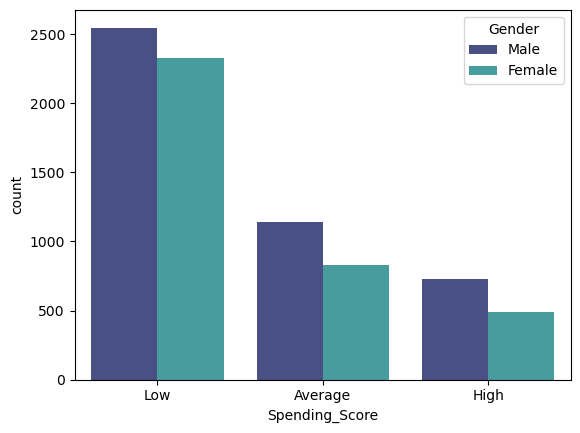

In [70]:
sns.countplot(x = "Spending_Score",data=cust_data,hue="Gender",palette="mako")
#most people are in the low spending category and equal women and men

<Axes: xlabel='Spending_Score', ylabel='Age'>

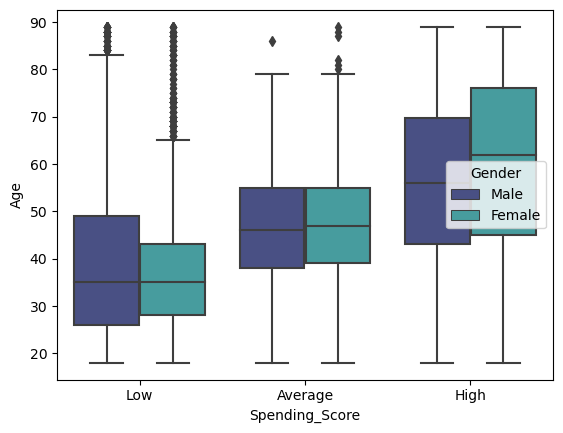

In [71]:
sns.boxplot(x="Spending_Score",y="Age",data=cust_data,hue="Gender",palette="mako")
#ages are almost equally distributed through spending_score,but higher level average age is high

<Axes: xlabel='Spending_Score', ylabel='count'>

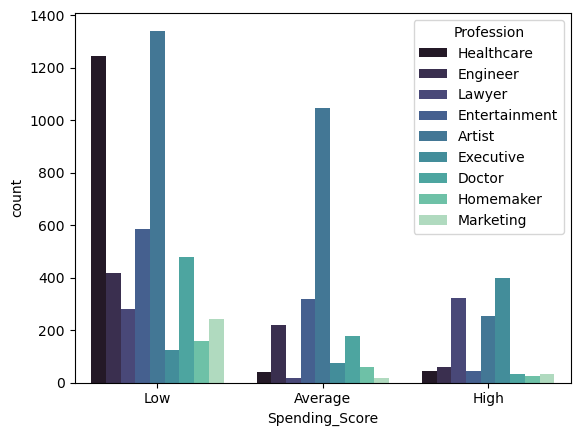

In [72]:
sns.countplot(x = "Spending_Score",data=cust_data,hue="Profession",palette="mako")
#many healthcare professionals have low spending habits along with entertainment
#while in avg entertaintment is most

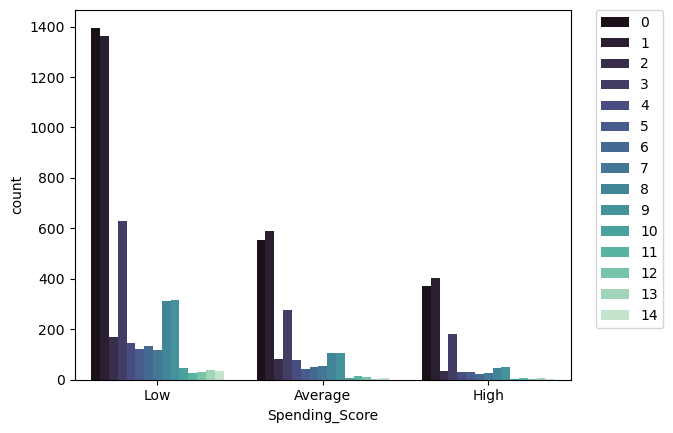

In [73]:
sns.countplot(x = "Spending_Score",data=cust_data,hue="Work_Experience",palette="mako")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#low work expierence corresponds to low spending habits

<Axes: xlabel='Spending_Score', ylabel='count'>

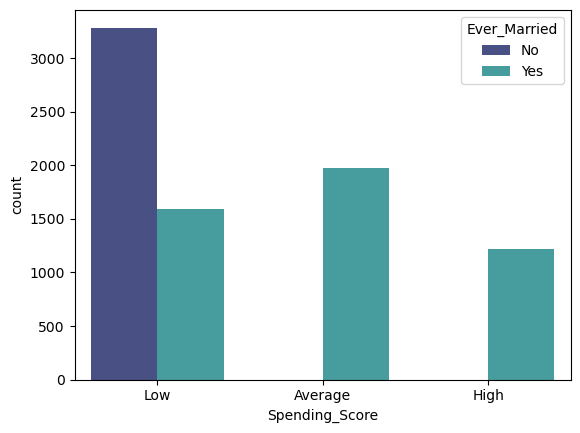

In [74]:
sns.countplot(x = "Spending_Score",data=cust_data,hue="Ever_Married",palette="mako")
#low spendinh habits seen in people who havent been married

In [75]:
#now visualization part is done 
#converting categorical to dummy columns
gndr = pd.get_dummies(cust_data["Gender"],drop_first=True)
evr_m = pd.get_dummies(cust_data["Ever_Married"],drop_first=True)
grad = pd.get_dummies(cust_data["Graduated"],drop_first=True)
prof = pd.get_dummies(cust_data["Profession"],drop_first=True)
wrk_ex = pd.get_dummies(cust_data["Work_Experience"],drop_first=True)
fam_sz = pd.get_dummies(cust_data["Family_Size"],drop_first=True)

In [76]:
cust_data = pd.concat([cust_data,gndr,evr_m,grad,prof,wrk_ex],axis=1)

In [88]:
cust_data = pd.concat([cust_data,fam_sz],axis=1)

In [77]:
cust_data.drop(["Gender","Ever_Married","Graduated","Profession","Work_Experience"],axis=1,inplace=True)

In [78]:
cust_data.drop(["ID","Age"],axis=1,inplace=True)

In [92]:
#converting int to str column named
cust_data["2"] = cust_data[2]
cust_data.drop(2,axis=1,inplace=True)
cust_data["3"] = cust_data[3]
cust_data.drop(3,axis=1,inplace=True)
cust_data["4"] = cust_data[4]
cust_data.drop(4,axis=1,inplace=True)
cust_data["5"] = cust_data[5]
cust_data.drop(5,axis=1,inplace=True)
cust_data["6"] = cust_data[6]
cust_data.drop(6,axis=1,inplace=True)
cust_data["7"] = cust_data[7]
cust_data.drop(7,axis=1,inplace=True)
cust_data["8"] = cust_data[8]
cust_data.drop(8,axis=1,inplace=True)
cust_data["9"] = cust_data[9]
cust_data.drop(9,axis=1,inplace=True)

In [86]:
cust_data["10"] = cust_data[10]
cust_data.drop(10,axis=1,inplace=True)
cust_data["11"] = cust_data[11]
cust_data.drop(11,axis=1,inplace=True)
cust_data["12"] = cust_data[12]
cust_data.drop(12,axis=1,inplace=True)
cust_data["13"] = cust_data[13]
cust_data.drop(13,axis=1,inplace=True)
cust_data["14"] = cust_data[14]
cust_data.drop(14,axis=1,inplace=True)

In [93]:
cust_data.columns

Index(['Spending_Score', 'Family_Size', 'Male', 'Yes', 'Yes', 'Doctor',
       'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker',
       'Lawyer', 'Marketing', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14'],
      dtype='object')

In [94]:
#data is converted into dummy variables
#splitting data
X = cust_data.drop("Spending_Score",axis=1)
y = cust_data["Spending_Score"]

In [95]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [96]:
#importing model
from sklearn.linear_model import LogisticRegression
#instance creation
log_model = LogisticRegression()

In [97]:
#training
log_model.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
#testing 
predictions = log_model.predict(X_test)

In [99]:
#evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

     Average       0.61      0.92      0.74       604
        High       0.75      0.63      0.68       385
         Low       0.97      0.80      0.88      1432

    accuracy                           0.80      2421
   macro avg       0.78      0.79      0.77      2421
weighted avg       0.84      0.80      0.81      2421

[[ 557   27   20]
 [ 121  243   21]
 [ 228   56 1148]]
